In [47]:
from Evaluator import Evaluator
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import itertools
import numpy as np
import numpy.linalg as LA

def euclidean_distance(a, b):
    return LA.norm(a - b)    

X, y = load_iris(return_X_y=True)
X = PCA(n_components = 2).fit_transform(X)
print 'IRIS is loaded.'
    
# Loading the Graph
from numpy import linalg as LA
from sklearn.neighbors import kneighbors_graph
import networkx as nx
k_neighbors = 5 #@param {type: "integer"}

# Getting adjacency matrix
A = kneighbors_graph(X, k_neighbors)

# Putting EuclideanDistance as graph weight
rows, cols = A.nonzero()
for i in range(len(rows)):
    A[rows[i],cols[i]] = float(LA.norm(X[rows[i],:] - X[cols[i],:]))

# Putting datapoint labels as "class" attribute on nodes
G = nx.from_scipy_sparse_matrix(A, create_using=nx.DiGraph())
for v in G.node:
    for u in G[v]:
        G[v][u]['weight'] = float(G[v][u]['weight'])

node_label = {}
for v in G.node.keys():
    node_label[v] = str(y[v])
# nx.set_node_attributes(G, 'class', node_label)

# Putting 2D position of each node on it for Graph layout
pos = {}
for i in range(X.shape[0]):
    G.node[i]['x'] = float(X[i,0])
    G.node[i]['y'] = float(X[i,1])
    pos[i] = (float(X[i,0]), float(X[i,1]))

IRIS is loaded.


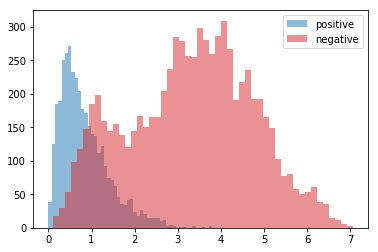

In [44]:
plt.hist(pos_dis, 50, alpha=0.5, label='positive', color='C0')
plt.hist(neg_dis, 50, alpha=0.5, label='negative', color='C3')
plt.legend(loc='upper right')
plt.show()

In [49]:
neg_diff = []
pos_diff = []
# Iterating over all (distinct) pairs of points.
for v, u in itertools.combinations(range(y.shape[0]), 2):
    diff = np.abs(X[v, :] - X[u, :])
    if y[v] == y[u]:
        pos_diff.append(diff)
    else:
        neg_diff.append(diff)

pos_diff = np.array(pos_diff)
neg_diff = np.array(neg_diff)

print pos_diff.shape
print neg_diff.shape

(3675, 2)
(7500, 2)


In [82]:
from scipy.stats import multivariate_normal

pos_norm = multivariate_normal(
    np.mean(pos_diff, axis=0),
    np.cov(pos_diff, rowvar=0))
neg_norm = multivariate_normal(
    np.mean(neg_diff, axis=0),
    np.cov(neg_diff, rowvar=0))

pos_prior = float(len(pos_diff)) / (len(pos_diff) + len(neg_diff))
neg_prior = 1 - pos_prior

print('Positive Prior: %.3f\nNegative prior: %.3f' % (pos_prior, neg_prior))


def prob(gaussian, prior, value):
    return prior * gaussian.pdf(value)


pos_prob = []
for v, u in G.edges():
    diff = np.abs(X[v,:] - X[u,:])
    neg_p = prob(neg_norm, neg_prior, diff)
    pos_p = prob(pos_norm, pos_prior, diff)
    pos_prob.append(pos_p / (pos_p + neg_p))


plt.figure(figsize=(12, 12))

nx.draw_networkx_nodes(G, pos,
                       node_size=1, node_color=y)
nx.draw_networkx_edges(G, pos,
                       edge_color=pos_prob, width=1.5,
                       edge_cmap=plt.cm.seismic, arrows=False)
u, v = list(G.edges())[0]

print X[v, :]
print X[u, :]
diff = np.abs(X[v, :] - X[u, :])
print prob(pos_norm, pos_prior, diff)
print prob(neg_norm, neg_prior, diff)


Positive Prior: 0.329
Negative prior: 0.671
[-2.77013891  0.27105942]
[-2.68420713  0.32660731]
0.124179665294
0.00927449946135
